In [ ]:
# keras imports for the dataset and building our neural network
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils
import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
# loading the dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


In [ ]:
len(X_train)

50000

In [ ]:
len(X_test)

10000

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [ ]:
X_train[0].shape

(32, 32, 3)

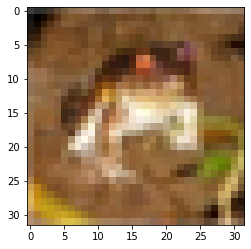

In [ ]:
plt.imshow(X_train[0]) #RGB---BGR

In [ ]:
y_train[0]

array([6], dtype=uint8)

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


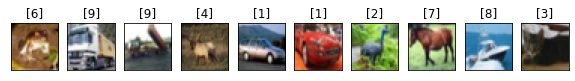

In [ ]:
# Display some images
fig, axes = plt.subplots(ncols=10, sharex=False, 
    sharey=True, figsize=(10, 4))
for i in range(10):
    axes[i].set_title(y_train[i])
    axes[i].imshow(X_train[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

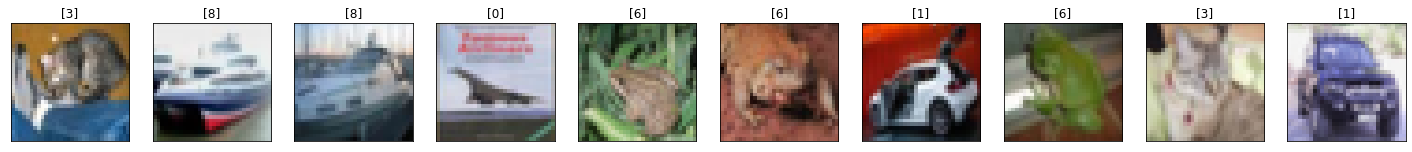

In [ ]:
# Display some images
fig, axes = plt.subplots(ncols=10, sharex=False, 
    sharey=True, figsize=(25, 12))
for i in range(10):
    axes[i].set_title(y_test[i])
    axes[i].imshow(X_test[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[[Text(0, 0, 'airplane'),
  Text(0, 0, 'automobile'),
  Text(0, 0, 'bird'),
  Text(0, 0, 'cat'),
  Text(0, 0, 'deer'),
  Text(0, 0, 'dog'),
  Text(0, 0, 'frog'),
  Text(0, 0, 'horse'),
  Text(0, 0, 'ship'),
  Text(0, 0, 'truck')]]

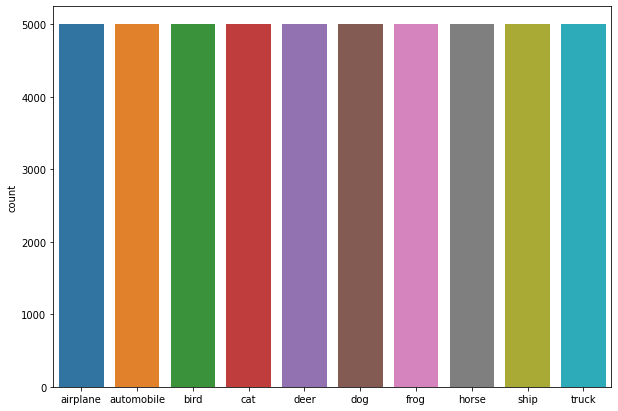

In [ ]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,7))
p = sns.countplot(y_train.flatten())
p.set(xticklabels=classes)

In [ ]:
X_train.shape[0]

50000

In [ ]:
X_train[0].shape

(32, 32, 3)

In [ ]:
X_train.shape[0]

50000

In [ ]:
X_train[0].dtype

dtype('uint8')

In [ ]:
# # building the input vector from the 32x32 pixels
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)


In [ ]:
# normalizing the data to help with the training
X_train =X_train/ 255
X_test =X_test/ 255

In [ ]:
# building a linear stack of layers with the sequential model
model = Sequential()

In [ ]:

# convolutional layer
conv_1=Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3))

#Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=(32, 32, 3)))

model.add(conv_1)


In [ ]:

# convolutional layer
conv2=Conv2D(filters=64, kernel_size=3, strides=1, padding='valid', activation='relu')
model.add(conv2)

mp2=MaxPool2D(pool_size=(2,2))
model.add(mp2)


In [ ]:

model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

In [ ]:
# flatten output of conv
model.add(Flatten())

In [ ]:
# hidden layer
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
# output layer
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_4 (Conv2D)           (None, 30, 30, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 15, 15, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)             

In [ ]:
# compiling the sequential model
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model for 10 epochs
model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
391/391 [==============================] - 7s 15ms/step - loss: 1.4995 - accuracy: 0.4586 - val_loss: 1.1924 - val_accuracy: 0.5779
Epoch 2/10
391/391 [==============================] - 5s 14ms/step - loss: 1.0168 - accuracy: 0.6447 - val_loss: 0.9745 - val_accuracy: 0.6612
Epoch 3/10
391/391 [==============================] - 5s 13ms/step - loss: 0.8233 - accuracy: 0.7148 - val_loss: 0.8233 - val_accuracy: 0.7159
Epoch 4/10
391/391 [==============================] - 5s 13ms/step - loss: 0.7080 - accuracy: 0.7537 - val_loss: 0.7879 - val_accuracy: 0.7373
Epoch 5/10
391/391 [==============================] - 5s 13ms/step - loss: 0.6091 - accuracy: 0.7865 - val_loss: 0.7595 - val_accuracy: 0.7481
Epoch 6/10
391/391 [==============================] - 5s 13ms/step - loss: 0.5193 - accuracy: 0.8184 - val_loss: 0.7459 - val_accuracy: 0.7536
Epoch 7/10
391/391 [==============================] - 5s 14ms/step - loss: 0.4324 - accuracy: 0.8493 - val_loss: 0.7811 - val_accuracy: 0.7496

In [ ]:
model.history.history

{'loss': [1.4995216131210327,
  1.0168498754501343,
  0.8233135342597961,
  0.7079952955245972,
  0.6090580224990845,
  0.5192967057228088,
  0.4323714077472687,
  0.3614882826805115,
  0.2901897430419922,
  0.23463213443756104],
 'accuracy': [0.45857998728752136,
  0.6446999907493591,
  0.7148000001907349,
  0.7536799907684326,
  0.7864599823951721,
  0.8183799982070923,
  0.8492599725723267,
  0.8723599910736084,
  0.8980799913406372,
  0.9173600077629089],
 'val_loss': [1.19239342212677,
  0.9745388627052307,
  0.8232770562171936,
  0.7878983020782471,
  0.7595417499542236,
  0.7458738684654236,
  0.7810829877853394,
  0.8339172601699829,
  0.8984442353248596,
  0.9978820085525513],
 'val_accuracy': [0.5778999924659729,
  0.6611999869346619,
  0.7159000039100647,
  0.7372999787330627,
  0.7480999827384949,
  0.753600001335144,
  0.7495999932289124,
  0.7516999840736389,
  0.7509999871253967,
  0.7364000082015991]}

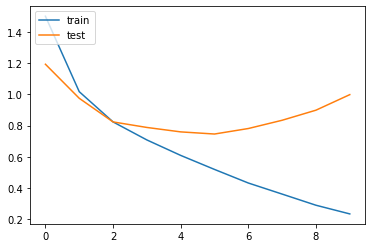

In [ ]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.legend(['train', 'test'], loc='upper left')

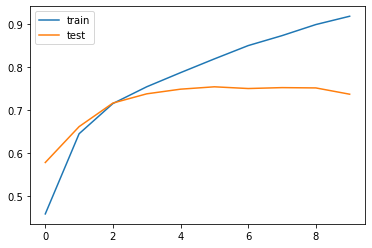

In [ ]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.legend(['train', 'test'], loc='upper left')

In [ ]:
import numpy as np
import tensorflow as tf
# Predict the values from the validation dataset
y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred,axis = 1) 
# Convert validation observations to one hot vectors
y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred_classes)

313/313 [==============================] - 1s 2ms/step


[[Text(0, 0.5, 'airplane'),
  Text(0, 1.5, 'automobile'),
  Text(0, 2.5, 'bird'),
  Text(0, 3.5, 'cat'),
  Text(0, 4.5, 'deer'),
  Text(0, 5.5, 'dog'),
  Text(0, 6.5, 'frog'),
  Text(0, 7.5, 'horse'),
  Text(0, 8.5, 'ship'),
  Text(0, 9.5, 'truck')],
 [Text(0.5, 0, 'airplane'),
  Text(1.5, 0, 'automobile'),
  Text(2.5, 0, 'bird'),
  Text(3.5, 0, 'cat'),
  Text(4.5, 0, 'deer'),
  Text(5.5, 0, 'dog'),
  Text(6.5, 0, 'frog'),
  Text(7.5, 0, 'horse'),
  Text(8.5, 0, 'ship'),
  Text(9.5, 0, 'truck')]]

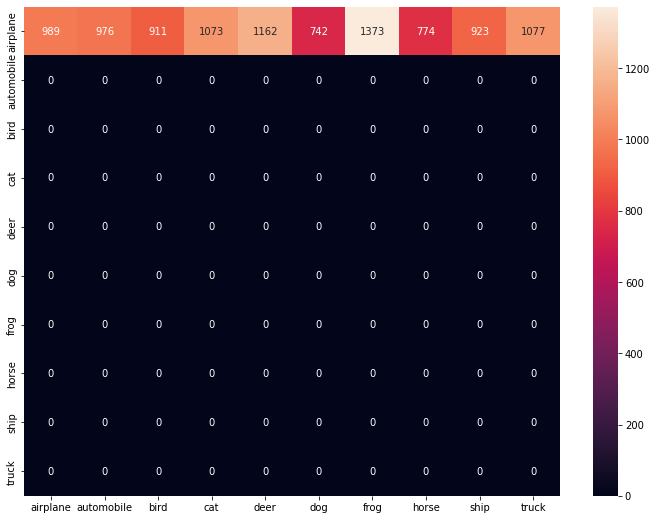

In [ ]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(12, 9))
c = sns.heatmap(confusion_mtx, annot=True, fmt='g')
c.set(xticklabels=classes, yticklabels=classes)